# Pruning deep neural networks to make them fast and small
## Train a VGG16 model for COVID19 detection, compress the model with pruning the model using Optimal Brain Damage (OBD) method

M. Amintoosi, m.amintoosi at gmail.com

This repository is based on the following 

https://jacobgil.github.io/deeplearning/pruning-deep-learning

In [1]:
import torch

In [2]:
import seaborn as sns
map_layer_nums = {0:1,2:2,5:3,7:4,10:5,12:6,14:7,17:8,19:9,21:10,24:11,26:12,28:13}

2560
{8: 302, 10: 352, 12: 343, 5: 127, 1: 31, 7: 124, 13: 390, 9: 306, 6: 120, 11: 337, 4: 47, 2: 32, 3: 49}


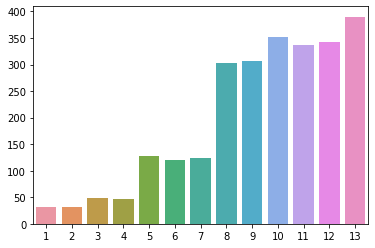

In [24]:
# OBD filters pruned
from collections import Counter
dic1 = {17: 68, 21: 72, 26: 70, 10: 30, 0: 6, 14: 28, 28: 63, 19: 62, 12: 23, 24: 65, 7: 10, 2: 9, 5: 6}
dic2 = {28: 86, 17: 70, 5: 12, 19: 56, 24: 73, 21: 52, 2: 6, 26: 69, 12: 27, 0: 7, 14: 24, 10: 20, 7: 10}
dic3 = {19: 67, 12: 21, 21: 76, 28: 86, 17: 55, 10: 13, 26: 72, 2: 9, 24: 77, 14: 21, 5: 4, 0: 5, 7: 6}
dic4 = {12: 21, 28: 87, 17: 53, 14: 22, 10: 27, 2: 3, 26: 75, 24: 56, 19: 66, 21: 78, 0: 6, 7: 10, 5: 8}
dic5 = {0: 7, 7: 11, 17: 56, 28: 68, 19: 55, 5: 19, 24: 66, 12: 28, 26: 57, 10: 37, 21: 74, 2: 5, 14: 29}
filters_pruned = dict(Counter(dic1)+Counter(dic2)+Counter(dic3)+Counter(dic4)+Counter(dic5))
filters_pruned
sum_filters_pruned = 0
dic_obd = {}
for k,v in filters_pruned.items():
    dic_obd[map_layer_nums[k]] = v
    sum_filters_pruned += v
print(sum_filters_pruned)
print(dic_obd)
keys_obd = list(dic_obd.keys())
vals_obd = [float(dic_obd[k]) for k in keys_obd]
sns.barplot(x=keys_obd, y=vals_obd)

2560
{13: 448, 12: 375, 8: 300, 10: 333, 7: 107, 11: 334, 6: 128, 9: 301, 5: 90, 2: 28, 4: 50, 1: 28, 3: 38}


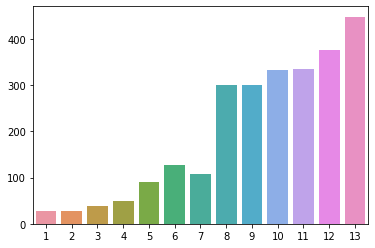

In [25]:
# Reg+OBD filters pruned
from collections import Counter
dic1 = {28: 289, 26: 73, 17: 33, 21: 46, 14: 9, 24: 15, 12: 8, 19: 27, 10: 3, 2: 3, 7: 2, 0: 3, 5: 1}
dic2 = {19: 69, 21: 102, 12: 26, 7: 8, 24: 57, 28: 70, 26: 87, 17: 45, 14: 24, 10: 15, 2: 4, 0: 1, 5: 4}
dic3 = {21: 89, 24: 97, 26: 72, 17: 75, 28: 32, 19: 64, 12: 27, 0: 1, 14: 23, 5: 4, 10: 14, 7: 9, 2: 5}
dic4 = {26: 80, 19: 61, 12: 30, 28: 31, 24: 91, 17: 71, 10: 21, 14: 27, 0: 12, 7: 14, 21: 50, 2: 8, 5: 16}
dic5 = {26: 63, 24: 74, 5: 13, 17: 76, 28: 26, 14: 24, 2: 8, 12: 37, 19: 80, 21: 46, 7: 17, 10: 37, 0: 11}
filters_pruned = dict(Counter(dic1)+Counter(dic2)+Counter(dic3)+Counter(dic4)+Counter(dic5))
filters_pruned
sum_filters_pruned = 0
dic_reg_obd = {}
for k,v in filters_pruned.items():
    dic_reg_obd[map_layer_nums[k]] = v
    sum_filters_pruned += v
print(sum_filters_pruned)
print(dic_reg_obd)
keys_reg_obd = list(dic_reg_obd.keys())
vals_reg_obd = [float(dic_reg_obd[k]) for k in keys_reg_obd]
sns.barplot(x=keys_reg_obd, y=vals_reg_obd)

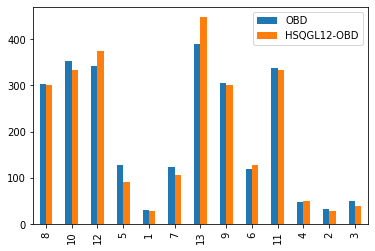

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

d = {
    'OBD': dic_obd,
    'HSQGL12-OBD': dic_reg_obd
}
pd.DataFrame(d).plot(kind='bar')
plt.show()
df = pd.DataFrame(d)

In [62]:
df1 = df.stack().reset_index().rename(columns={'level_1': 'Method', 0: 'Num Filters Pruned'})
df1.rename(columns={"level_0": "Layer No."},inplace=True)
df1

Layer No.       Method  Num Filters Pruned
0           8          OBD                 302
1           8  HSQGL12-OBD                 300
2          10          OBD                 352
3          10  HSQGL12-OBD                 333
4          12          OBD                 343
5          12  HSQGL12-OBD                 375
6           5          OBD                 127
7           5  HSQGL12-OBD                  90
8           1          OBD                  31
9           1  HSQGL12-OBD                  28
10          7          OBD                 124
11          7  HSQGL12-OBD                 107
12         13          OBD                 390
13         13  HSQGL12-OBD                 448
14          9          OBD                 306
15          9  HSQGL12-OBD                 301
16          6          OBD                 120
17          6  HSQGL12-OBD                 128
18         11          OBD                 337
19         11  HSQGL12-OBD                 334
20          4          OBD                  47
21          4  HSQGL12-OBD                  50
22          2          OBD                  32
23          2  HSQGL12-OBD                  28
24          3          OBD                  49
25          3  HSQGL12-OBD                  38

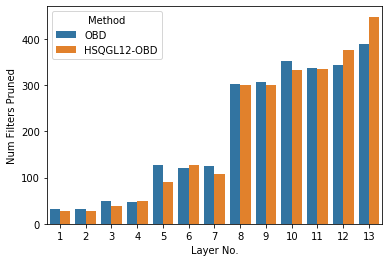

In [63]:
sns.barplot(x=df1['Layer No.'], y='Num Filters Pruned', data=df1, hue='Method')

In [1]:
# melted = pd.melt(df, id_vars=df.index, value_vars=['OBD'],
#              var_name="Person", value_name="Score")
# melted             

In [11]:
from finetune_SpReg import ModifiedVGG16Model
import torch.nn as nn
models_dir = 'C:/Archive/data/models/covid/'

ds_name = 'COVID-Radiography'
eps = 1e-3
mdl_list = ['vgg_covid_e25_adam.pt' ,'vgg_HSQGL12.pt', 'vgg_taylor_pruned.pt', 'vgg_HSQGL12_taylor_pruned.pt', 'vgg_taylor_pruned_HSQGL12.pt']
te = 134256320 #134268738
for mdl in mdl_list:
    model_file_name = models_dir+mdl
    model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
    num_el = 0
    num_zeros = 0
    for n, _module in model.named_modules():
#         print(_module)
        if isinstance(_module, nn.Conv2d) or isinstance(_module, nn.Linear) and (not 'downsample' in n):
            w = torch.flatten(_module.weight)
            num_el += w.shape[0]
            num_zeros += torch.sum(torch.abs(w)<eps)
    ze = num_zeros.cpu().detach().numpy()
#     print(mdl, num_zeros, num_el, nz/num_el)
    print("{} ze:{}, ne/te:{}, ze/te:{}".format(mdl,num_zeros.cpu(), num_el/te, ze/te))
    break


vgg_covid_e25_adam.pt ze:17491836, ne/te:0.9999075138398933, ze/te:0.13027482242366797


In [12]:
num_el

134256320

In [23]:
# for n, _module in model.named_modules():
#     print(_module)
# from torchsummary import summary
# mdl_list = ['vgg_HSQGL12.pt', 'vgg_taylor_pruned.pt', 'vgg_HSQGL12_taylor_pruned.pt']
# for mdl in mdl_list:
#     model_file_name = models_dir+mdl
#     model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
#     summary(model, (3, 224, 224))

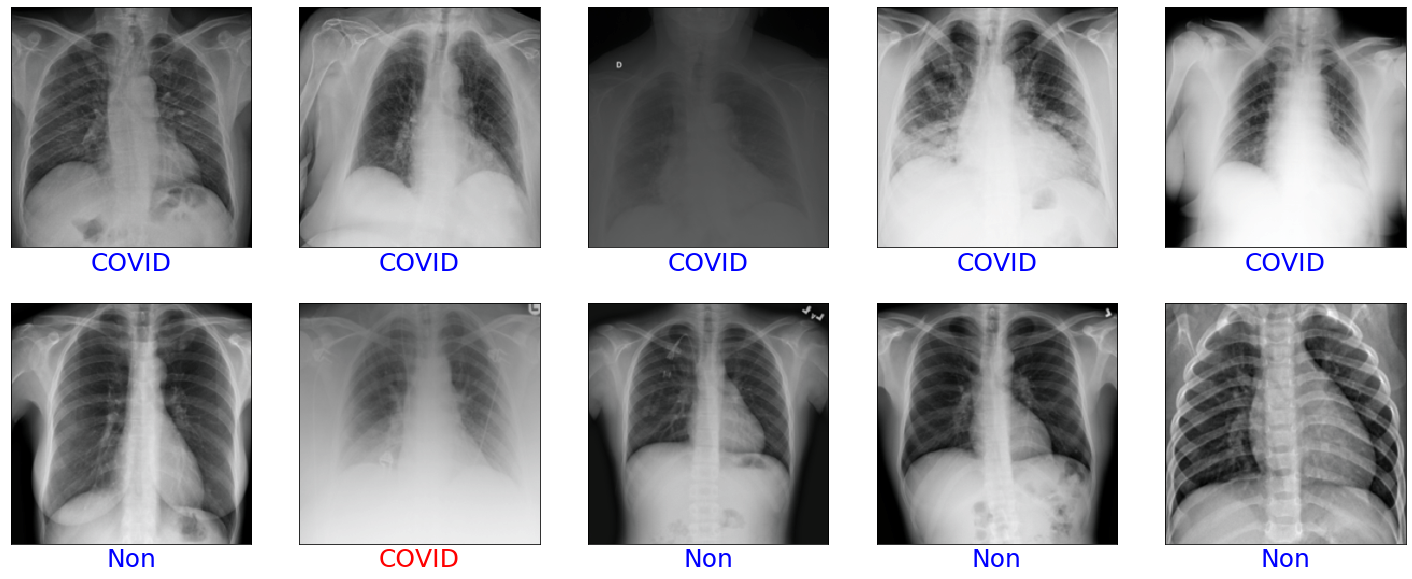

Accuracy : 0.83
Wall time: 1min 43s


In [27]:
%%time
%run finetune_SpReg.py --test --ds_name COVID-Radiography \
  --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/test --input_model vgg_HSQGL12

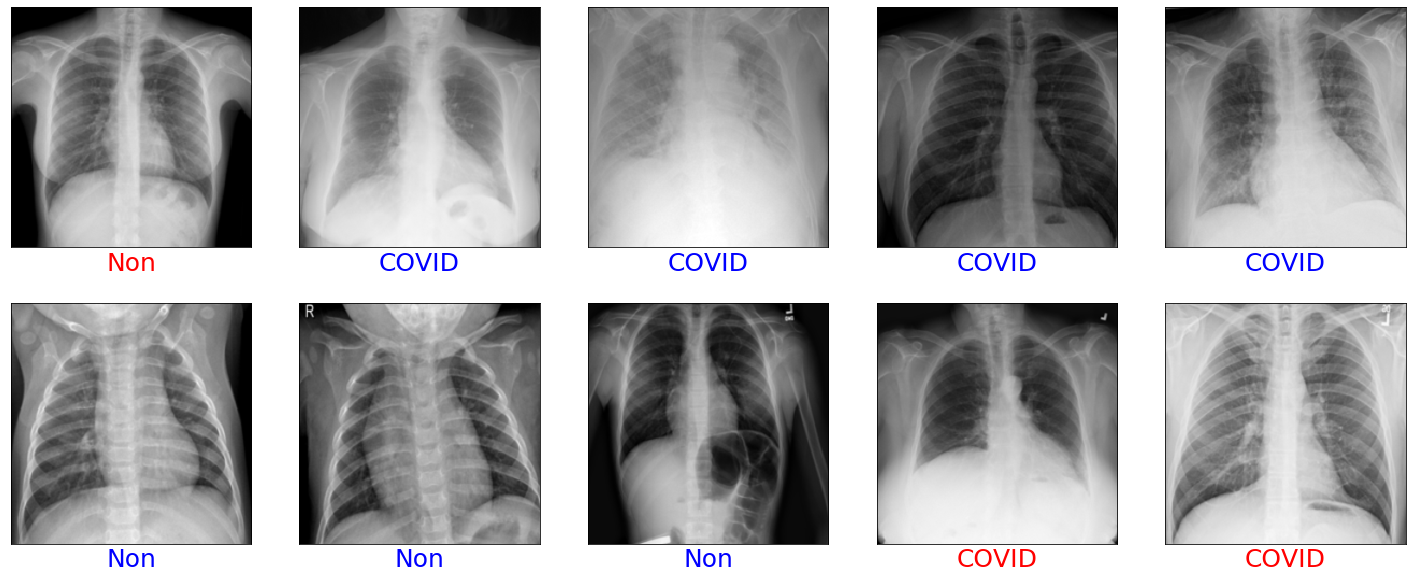

Accuracy : 0.7


In [16]:
%%time
%run finetune_SpReg.py --test --ds_name COVID-Radiography   --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/test --input_model vgg_taylor_pruned

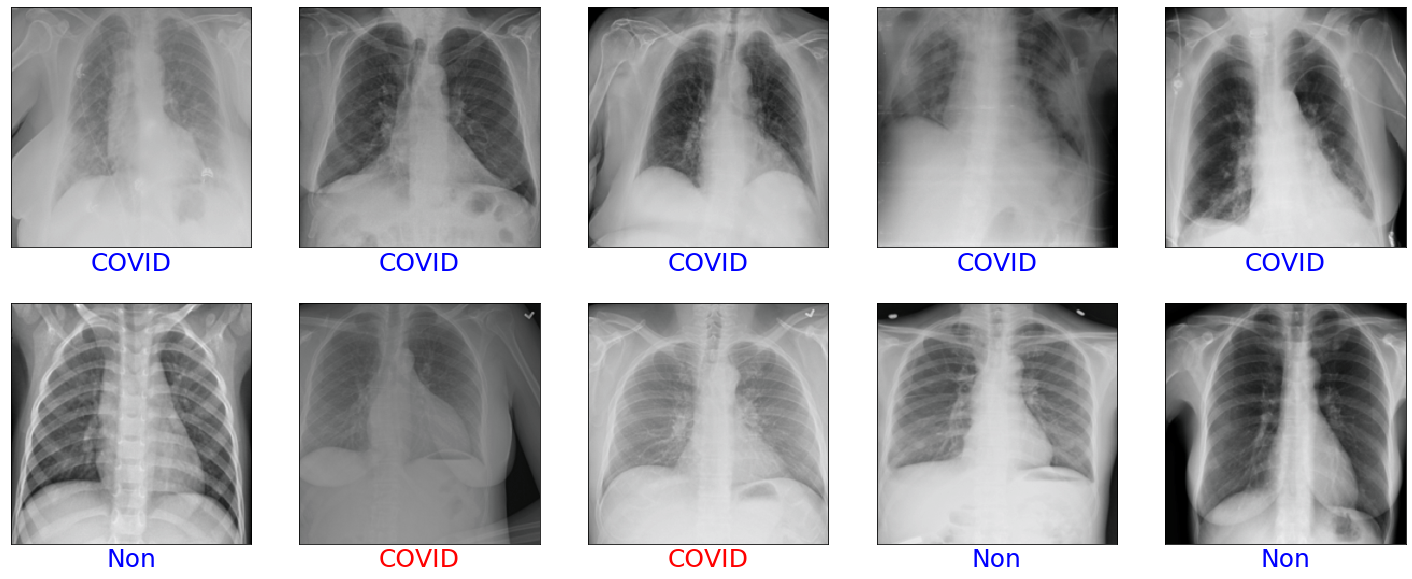

Accuracy : 0.755
Wall time: 33.3 s


In [25]:
%%time
# Test the pruned model
# %run finetune.py --test --train_path 'data/train' --test_path 'data/train'
%run finetune_SpReg.py --test --ds_name COVID-Radiography \
  --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/test  --input_model vgg_HSQGL12_taylor_pruned

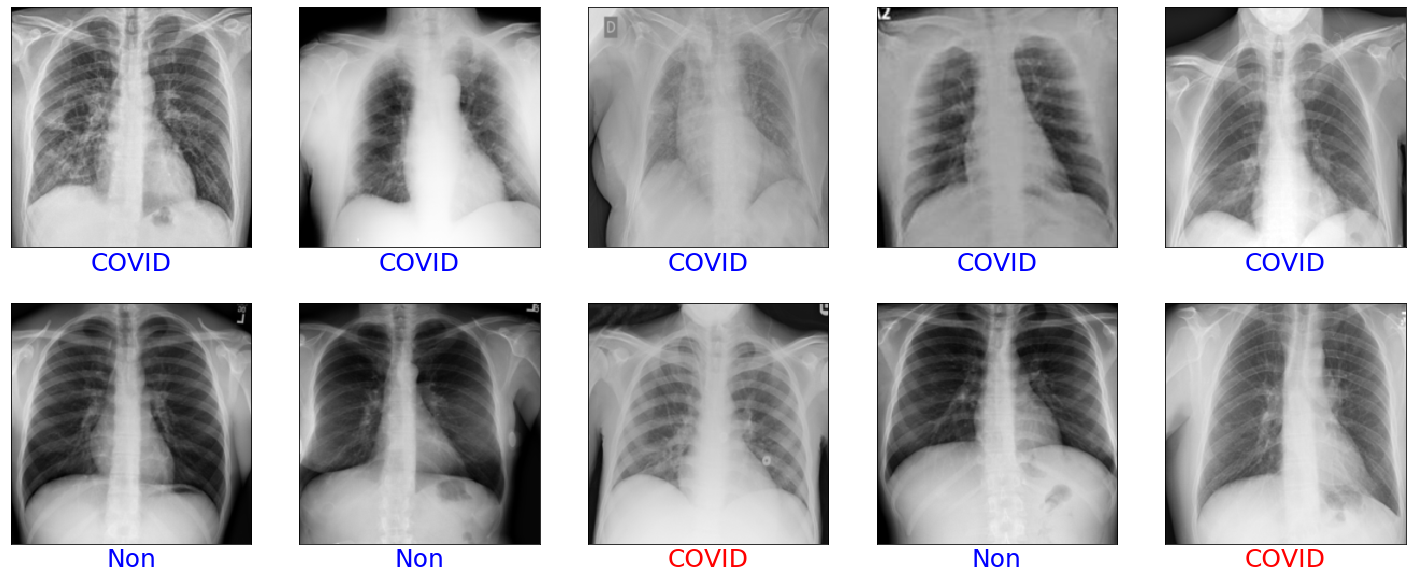

Accuracy : 0.695


In [75]:
%run finetune_SpReg.py --test --ds_name COVID-Radiography --reg_name HSQGL12 \
  --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/test

In [71]:
models_dir = 'C:/Archive/data/models/covid/'

ds_name = 'COVID-Radiography'
eps = 1e-3
for prn in ['','_pruned']:
    for reg_name in ['None','HSQGL12']:
        model_file_name = '{}VGG_model_{}_reg-{}{}.pt'.format(models_dir, ds_name, reg_name,prn)
        model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
        num_el = 0
        num_zeros = 0
        for n, _module in model.named_modules():
            if isinstance(_module, nn.Conv2d) and (not 'downsample' in n):
                w = torch.flatten(_module.weight)
                num_el += w.shape[0]
                num_zeros += torch.sum(torch.abs(w)<eps)
        nz = num_zeros.cpu().detach().numpy()
        print(model_file_name, num_zeros, num_el, nz/num_el)        


C:/Archive/data/models/covid/VGG_model_COVID-Radiography_reg-None.pt tensor(702298) 14710464 0.047741390074439526
C:/Archive/data/models/covid/VGG_model_COVID-Radiography_reg-HSQGL12.pt tensor(702298) 14710464 0.047741390074439526
C:/Archive/data/models/covid/VGG_model_COVID-Radiography_reg-None_pruned.pt tensor(41148) 998775 0.04119846812345123
C:/Archive/data/models/covid/VGG_model_COVID-Radiography_reg-HSQGL12_pruned.pt tensor(41426) 987318 0.041958112786356576


In [67]:
nz = num_zeros.cpu().detach().numpy()#, num_el
nz/num_el

0.4475241569538527

In [45]:
# print(model)
x = 0
eps = 1e-3
for n, _module in model.named_modules():
    if isinstance(_module, nn.Conv2d) and (not 'downsample' in n):
        # print(torch.flatten(_module.weight).shape)
        w = torch.flatten(_module.weight)
        x += torch.sum(torch.abs(w)<eps)
        # print(x)
        # x += torch.norm(, 2)
        # break
print(x)        

tensor(41148)


In [ ]:
# !git clone https://github.com/mamintoosi/OBD-for-VGG-Pruning-COVID19

In [ ]:
# %cd OBD-for-VGG-Pruning-COVID19

In [22]:
# Download a pre-trained VGG16 model and train it
# %%time
# %run finetune_SpReg.py --train --use-cuda --train_path 'data/train' --test_path 'data/val'
# %run finetune.py --train --train_path 'C:/temp/git/OBD-for-VGG-Pruning-COVID19/data/train' --test_path 'C:/temp/git/OBD-for-VGG-Pruning-COVID19/data/val'

In [ ]:
# Print the trained model
print(model)

In [ ]:
# Pruning the trained model
# %%time
# %run finetune.py --prune --use-cuda --train_path 'data/train' --test_path 'data/val'

In [ ]:
# Print the pruned model
print(model)

In [ ]:
# Test the pruned model
# %run finetune.py --test --train_path 'data/train' --test_path 'data/test'

In [73]:
%%time
# For reproducible results 
# torch.manual_seed(1)
# random.seed(1)
# Download a pre-trained VGG16 model and train it
%run finetune_SpReg.py --train --train_epoch 4 --reg_name L1 --ds_name COVID-Radiography \
  --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/val

Epoch:  0 / 4


AttributeError: module '__main__' has no attribute '__spec__'